In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# 訓練テータ読み込み
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
# 乱数を固定する
import random
np.random.seed(1234)
random.seed(1234)

In [4]:
# データ数の確認
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
# 先頭行の確認
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",50)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 先頭行の確認
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# データタイプの確認
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# 統計量の確認
train_df.describe()
# test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# カテゴリ変数の確認
# Name, Sex, Ticket, Cabin, Embarked
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
train_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [12]:
# 欠損値の確認
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# データを可視化する
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [15]:
# カテゴリ変数を集計する
train_df[["Embarked","Survived","PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [16]:
# 欠損値を落とし、グループ化する
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [17]:
# 横持ち表現(unstack)
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()

In [18]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

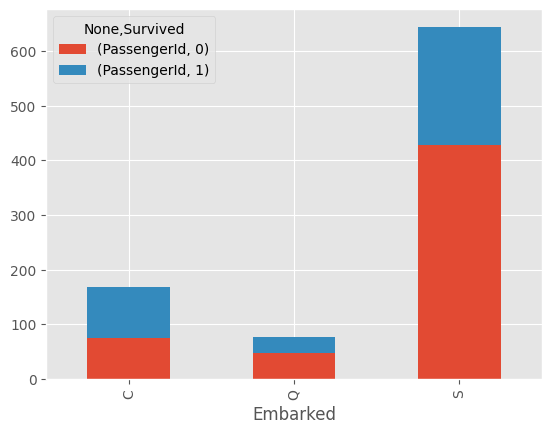

In [19]:
# 積み上げ棒グラフ
embarked_df.plot.bar(stacked=True)

In [20]:
# 生存者数/全体数
embarked_df["survived_rate"]=embarked_df.iloc[:,0]/(embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [21]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<Axes: xlabel='Sex'>

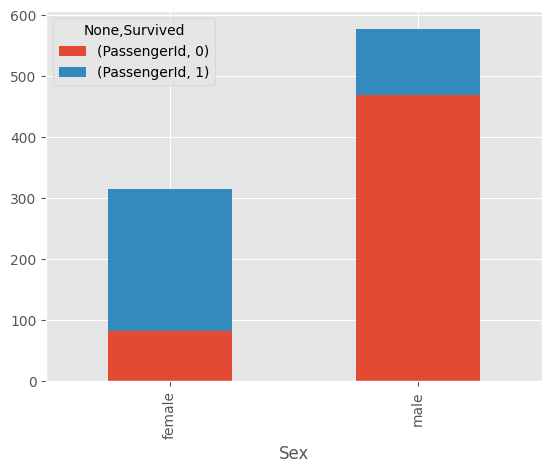

In [22]:
# 性別ごとの生存者数
sex_df = train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

<Axes: xlabel='Pclass'>

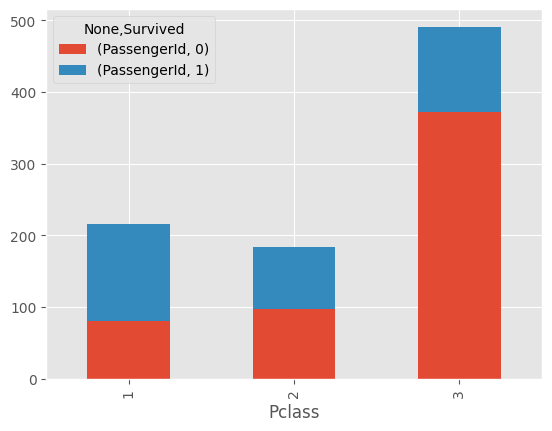

In [23]:
# チケット階級ごとの生存数
ticket_df = train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

In [24]:
# 年代ごとの生存数
# (NAが含まれているため、コードの間違いと思われる)
# plt.hist((train_df[train_df["Survived"]==0][["Age"]].values,\
#           train_df[train_df["Survived"]==1][["Age"]].values),\
#          histtype="barstacked", bins=8, label=("Death", "Survive"))
# plt.legend()

In [25]:
# カテゴリ変数をダミー変数化
train_df_corr = pd.get_dummies(train_df,columns=["Sex"],drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr,columns=["Embarked"])

In [26]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


In [27]:
# 訓練データとテストデータを結合
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [28]:
# 全体の欠損値を確認する
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [29]:
# Fareの欠損データを穴埋めする
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

In [30]:
# カラムを変更
Fare_mean.columns = ["Pclass", "Fare_mean"]

In [31]:
# チケット階級ごとの料金
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [32]:
# 欠損値を平均値で埋める
# on = 共通列を指定, how = 結合先(Fara_mean)の値が右に来るように指定(Pclassが左側)
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")

# 欠損値は平均値で補完(ifと同じ効果)
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]

# 保管した後は列削除
all_df = all_df.drop("Fare_mean", axis=1)

In [33]:
# 敬称の確認
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [34]:
# 敬称を変数として追加(分離)
# 出力を複数列化するには"expand=True"が必要
# 分割して3番目までを保存
name_df = all_df["Name"].str.split("[,.]",n=2,expand=True)

In [35]:
name_df.columns = ["family_name", "honorific", "name"]

In [36]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [37]:
# 先頭と末尾の空白文字削除
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [38]:
# 敬称ごとの人数をカウント
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [39]:
# もとのdfに結合
all_df = pd.concat([all_df, name_df], axis=1)

<Axes: xlabel='honorific', ylabel='Age'>

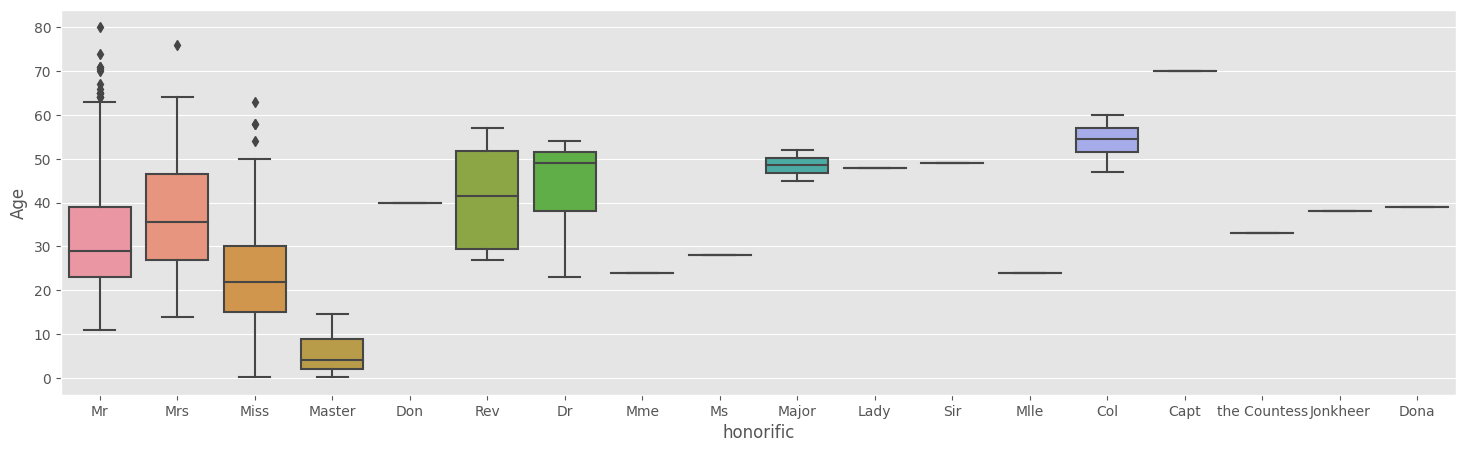

In [40]:
# 箱ひげ図を描く
plt.figure(figsize=(18,5))
sns.boxplot(x="honorific",y="Age",data=all_df)

In [41]:
# 敬称ごとの平均値を確認
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [42]:
name_df[len(train_df):]

,family_name,honorific,name
891,Kelly,Mr,James
892,Wilkes,Mrs,James (Ellen Needs)
893,Myles,Mr,Thomas Francis
894,Wirz,Mr,Albert
895,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [43]:
# 敬称ごとの生存率の違い
# name_dfはall_dfから作っているので、train_dfとtest_dfに分割して結合している
# name_df[len(test_df):]末尾から抽出している
train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
test_df = pd.concat([test_df,name_df[len(test_df):].reset_index(drop=True)],axis=1)

<Axes: xlabel='honorific'>

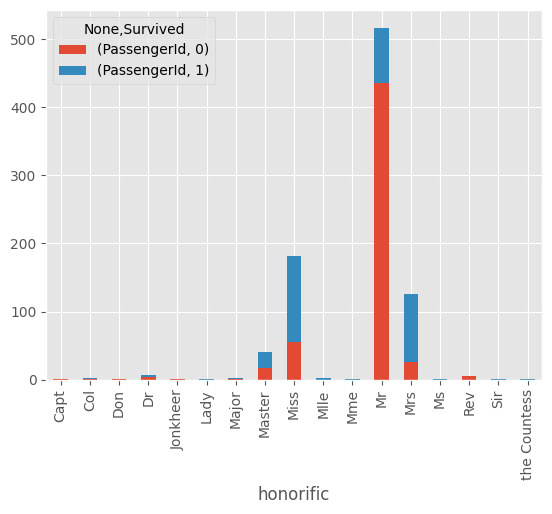

In [44]:
# 敬称ごとのSurvivedの人数を集計
honorific_df = train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [45]:
# 敬称の平均値を算出する
honorific_age_mean = all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean_columns = ["honorific", "honorific_Age"]

In [46]:
honorific_age_mean

,honorific,Age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [47]:
# all_dfにhonorific_age_meanを結合する
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")

# Ageのカラム名称を変更する
all_df.rename(columns={"Age_x":"Age","Age_y":"honorific_Age"},inplace=True)

# 欠損値に平均値を代入する
all_df.loc[(all_df["Age"].isnull(),"Age")] = all_df["honorific_Age"]

# honorific_Age列を削除する
all_df = all_df.drop(["honorific_Age"],axis=1)

In [48]:
# 乗船している親子、兄弟、配偶者の数
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

In [49]:
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [50]:
# 家族がゼロの人は"alone"列に1を代入
all_df.loc[all_df["family_num"] == 0, "alone"] = 1

# naには0を代入し上書き
all_df["alone"].fillna(0, inplace=True)

In [51]:
# 不要な変数は削除する
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"],axis=1)

In [52]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [53]:
# カテゴリ変数の抽出
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [54]:
# Mr,Miss,Mrs,Master以外はその他
all_df.loc[~((all_df["honorific"] == "Mr") | \
            (all_df["honorific"] == "Miss") | \
            (all_df["honorific"] == "Mrs") | \
            (all_df["honorific"] == "Master")),\
          "honorific"] = "other"

In [55]:
all_df["honorific"].value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

# Embarkedの欠損値を"missing"に置き換えた
all_df["Embarked"].fillna("missing", inplace=True)

In [57]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [58]:
# Sexをラベル化(0 or 1)に分類した
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [59]:
# カテゴリ列をラベル化する
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [60]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.000000,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.000000,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.000000,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.000000,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.000000,0,0,8.0500,2,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0
1305,NaN,1,0,39.000000,0,0,108.9000,0,4,0,1.0
1306,NaN,3,1,38.500000,0,0,7.2500,2,2,0,1.0
1307,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0


In [61]:
# "Survived"=NA=>test data
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived",axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

# trainからSurvivedをドロップする
test_X = all_df[all_df["Survived"].isnull()].drop("Survived",axis=1).reset_index(drop=True)

In [62]:
train_Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

---
#### ここからモデリングの始まり  
---

In [63]:
# ライブラリのインポート
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [64]:
# 学習用、検証用データに分ける
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [65]:
# lightgbmではカテゴリ変数列を指定するとone-hotに最適化してくれるらしい
# テストデータではreferenceで訓練データを指定できる
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [66]:
lgbm_params = {
    "objective": "binary",
    "random_seed": 1234
}

In [67]:
# モデル実行
model_lgb = lgb.train(lgbm_params,
                     lgb_train,
                     valid_sets = lgb_eval,
                     num_boost_round = 100,
                     early_stopping_rounds = 20,
                     verbose_eval=10)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [68]:
# 重要度を算出
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0], dtype=int32)

<Axes: >

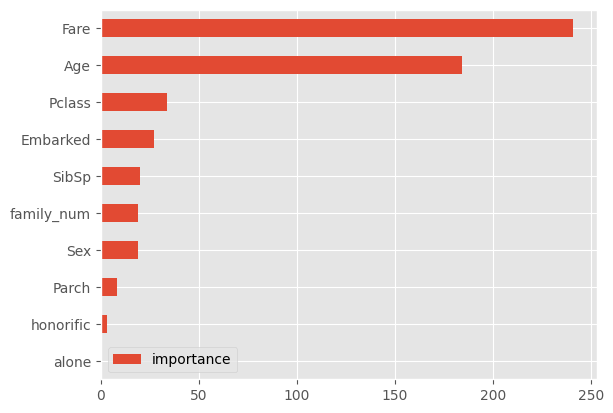

In [69]:
# indexはカラム順のまま特徴変数を指定すればOK
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns,\
                         columns = ["importance"]).sort_values(by="importance",ascending=True)

# 水平棒グラフ
importance.plot.barh()

In [70]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [71]:
# 正解率の計算
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

In [72]:
# submissionファイルとして保存
y_pred_test1 = model_lgb.predict(test_X, num_iteration=model_lgb.best_iteration)
preds_int1 = (y_pred_test1 > 0.5).astype(int)
submission["Survived"] = preds_int1
submission.to_csv("submission1.csv", index=False)

---
#### ここからパラメータ最適化時の結果を加える
---

In [73]:
# ハイパーパラメータの調整
lgbm_params = {
    "objectie": "binary",
    "max_bin": 331,
    "num_leaves": 20,
    "min_data_in_leaf": 57,
    "random_seed": 1234
}

In [74]:
# データセットの設定
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [75]:
# 学習の過程を記録
lgb_results={}

model_lgb = lgb.train(lgbm_params,
                     lgb_train,
                     valid_sets=[lgb_train,lgb_eval],
                     valid_names=['Train','Test'],
                     num_boost_round=100,
                     early_stopping_rounds=20,
                     verbose_eval=10,
                     evals_result=lgb_results
                     )

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will

[LightGBM] [Warning] Unknown parameter: objectie
[LightGBM] [Warning] Unknown parameter: objectie
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Warning] Unknown parameter: objectie
[LightGBM] [Info] Start training from score 0.382022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [76]:
# 最良の学習繰り返し数のときの正解率を算出
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
accuracy_score(y_valid, np.round(y_pred))

0.8547486033519553

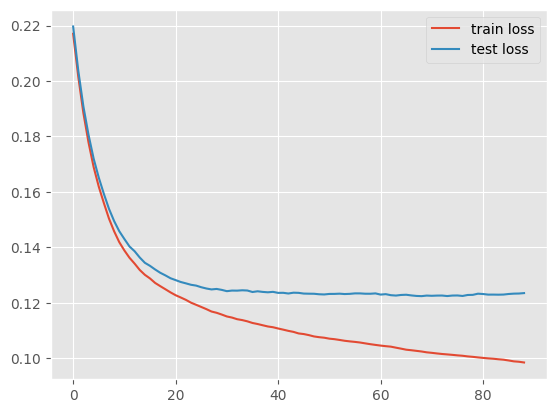

In [77]:
# 学習履歴をグラフ化
loss_train = lgb_results['Train']['l2']
loss_test = lgb_results['Test']['l2']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(loss_train, label='train loss')
ax1.plot(loss_test, label='test loss')

plt.legend()
plt.show()
plt.close()

In [78]:
# submissionファイルとして保存
y_pred_test2 = model_lgb.predict(test_X, num_iteration=model_lgb.best_iteration)
preds_int2 = (y_pred_test2 > 0.5).astype(int)
submission["Survived"] = preds_int2
submission.to_csv("submission2.csv", index=False)

---
#### 最後に交差検証を行う
---

In [79]:
# クロスバリデーションを行う
folds = 3

kf = KFold(n_splits=folds)

In [80]:
models = []
accuracy = []
lgb_result={}
lgb_results=[]

# 交差検証でデータセットを3分割している。
# val_indexは3分割の1から3まで順番のデータセット
# train_indexはそれ以外2つずつのデータセット組となる
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories,reference=lgb_train)
    
    model_lgb = lgb.train(params = lgbm_params,
                         train_set = lgb_train,
                         valid_sets = [lgb_train,lgb_eval],
                         valid_names = ['Train','Test'],
                         num_boost_round=100,
                         early_stopping_rounds=20,
                         verbose_eval=10,
                         evals_result = lgb_result
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    accuracy.append(accuracy_score(y_valid, np.round(y_pred)))
    print(accuracy_score(y_valid, np.round(y_pred)))

    lgb_results.append(lgb_result)
    models.append(model_lgb)


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will

[LightGBM] [Warning] Unknown parameter: objectie
[LightGBM] [Warning] Unknown parameter: objectie
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Warning] Unknown parameter: objectie
[LightGBM] [Info] Start training from score 0.397306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will

In [81]:
# 予測値を入れる
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [82]:
# 交差検証の正解率も平均を取る
acc_mean = np.array(accuracy).mean()
print(acc_mean)

0.8316498316498316


In [83]:
# 3回の平均を取る
preds_array = np.array(preds)
preds_mean = np.mean(preds_array,axis=0)

In [84]:
preds_int3 = (preds_mean > 0.5).astype(int)

In [85]:
submission["Survived"] = preds_int3

In [86]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
submission.to_csv("submission3.csv", index=False)

---
### 各パートでの正解率を比較する
---